
##  Bidirectional dc-to-dc converter
##### Professor Humberto Pinheiro, Ph.D.
##### Fundamentos de Eletrônica de Potência - DPEE 1072


In [1]:
import numpy as np
from numpy import pi
from scipy import sqrt, exp, cos, matrix, vstack, hstack, zeros
from scipy.linalg import block_diag
import matplotlib.pyplot as plt
import mpld3
import math as m
import cmath
import sympy as sp
sp.init_printing()

## Introduction
* Dc-to-dc converter are widely used to interface dc links with diferent voltages in applications such as UPS, Electrical Vehicles and Energy store systems [1].
![dc-to-dc2.png](dc-to-dc2.png)


 The transistors $Q_1$ and $Q_2$ are controlled in a complementary way, that is, when $Q_1$ is on the transistor $Q_2$ is off. Similarly, when $Q_2$ is on $Q_1$ is off. It is essential to mention that, in practice, a small deadtime is required to be introduced during the transitions $v_{gs}$ signals of $Q_1$ and $Q_2$. This is to avoid short circuits and possible damage to the transistors. The duration of the deadtime can be defined from the transistor datasheet switching parameters.

 
 ![dc-to-dc bidirectinal1.png](PWM0.png)
                (a)Asymmetric Regular Sampled PWM.  $T_s=0.5T_{sw}$
 ![dc-to-dc bidirectinal1.png](PWM.png)
                (b)Symmetric Regular Sampled PWM.    $T_s=T_{sw}$
 ![dc-to-dc bidirectinal1.png](PWM2.png)
                (c) Regular Sampled PWM where $T_s=2T_{sw}$.
                
  $T_s$: Sampling Period.
  
  $T_{sw}$: Switching Period.

The above figure also indicates the signal that defines the interruption service routine execution: the green arrow. In addition, it is also indicated the time duration of the AD conversion, the controller, and modulation. In the above figure (b), the switching and the sampling frequency and equal, resulting in what is known as symmetric regular sampled PWM. Figures (a) and (c) can be selected depending on the computational power available.  

In [2]:
Prated=3000
E1=400
E2=200   
d=200/400  
fsw=100000
T=1/fsw
print ( ' fsw=', fsw/1000,'kHz')
print ( ' T=', T*10**6,'us')
print( ' d=',d)


 fsw= 100.0 kHz
 T= 10.0 us
 d= 0.5


The operation of this converter is similar to a Buck in CCM, that is, it has two operation stages and the inductor current ripple can be expressed as:

${I_M} - {I_m} = \Delta I = {\rm{ }}\frac{{{E_1} - {E_2}}}{L}dT{\rm{  }}$

The maximum and minimum values os the current can be expressed as:

${I_M} =I_{L_{av}}+ \frac{\Delta I}{2} $

${I_m} =I_{L_{av}}- \frac{\Delta I}{2} $

where

$I_{L_{av}}=\frac{P_{rated}}{E_2}$

Let us assume that $I_M$ and $I_m$ are greater than zero, then energy associated with the turn-off the transistor $Q_1$ must be compute for $I_M$ and the energy associated wiht the turn on of $Q_1$ must be compute for $I_m$. The turn-on and turn-off losses associates $Q_2$ are zero but there is recovery losses associated with its body diode.
In order to exemplify the design let us assum a 
current ripple of 100% peak-to-peak.


In [3]:
IL_av=Prated/E2
Delta_I=1*IL_av
L=(E1-E2)/Delta_I*d*T
print ( ' L=', L*10**6,'uH')
I_M=IL_av+Delta_I/2
I_m=IL_av-Delta_I/2
print ( ' I_M=', I_M,'A')
print ( ' I_m=', I_m,'A')

 L= 66.66666666666667 uH
 I_M= 22.5 A
 I_m= 7.5 A


Let us initially select the SiC MOSFET 

![dc-to-dc bidirectinal1.png](MOSFET.png)


https://www.wolfspeed.com/media/downloads/1628/C3M0060065D.pdf


The transistor manufacture provides the energies associated with the commutations, in this case, for example, one has:
![dc-to-dc bidirectinal1.png](energies.png)

From the energy curves above we have:

In [4]:
x=[5,10,15,20,25]
yoff=[16,15,21,40,50]
yon=[40,57,93,145,214]
pol_on=np.polyfit(x,yon,3)
pol_off=np.polyfit(x,yoff,3)


current=I_m
Eon=0
for c, p in enumerate(pol_on):
    Eon += p * I_m ** (3 - c)

Eoff=0
for c, p in enumerate(pol_off):
    Eoff += p * I_M ** (3 - c)    
Etotal=Eon+Eoff
print( 'E_on=',Eon,'uJ')
print( 'E_off=',Eoff,'uJ')
print( 'E_total=',Etotal,'uJ')
Pcomm_Q1=(Etotal*10**-6)*fsw;
print( 'Total Commutation Losses=',Pcomm_Q1,'W')

Rdson=60*10**-3
t=sp.symbols('t')
Irms_Q1=sp.sqrt(1/T*sp.integrate( (I_m+(E1-E2)*t/L)**2,(t,0,d*T)))
print('Irms_Q1=',Irms_Q1,'A')
Pcond_Q1=Rdson*Irms_Q1**2
P_total_Q1=Pcond_Q1+Pcomm_Q1;
print('Q1 Conduction Losses=',Pcond_Q1,'W')
print('Total Q1 Losses=',P_total_Q1,'W')

Irms_Q2=sp.sqrt(1/T*sp.integrate( (I_M-(E2*(t-d*T))/L)**2,(t,d*T,T)))
print('Irms_Q2=',Irms_Q2,'A')
Pcond_Q2=Rdson*Irms_Q2**2;
P_total_Q2=Pcond_Q2+0;
print('Q2 Conduction Losses=',Pcond_Q2,'W')
print('Total Q2 Losses=',P_total_Q2,'W')


print ('Total Power Semiconductor losses=',P_total_Q2+P_total_Q1,'W')

E_on= 46.25535714285714 uJ
E_off= 45.27500000000007 uJ
E_total= 91.53035714285721 uJ
Total Commutation Losses= 9.153035714285721 W
Irms_Q1= 11.0397010829098 A
Q1 Conduction Losses= 7.31250000000000 W
Total Q1 Losses= 16.4655357142857 W
Irms_Q2= 11.0397010829098 A
Q2 Conduction Losses= 7.31249999999999 W
Total Q2 Losses= 7.31249999999999 W
Total Power Semiconductor losses= 23.7780357142857 W


### Thermal Model
The heatsink can be defined from the thermal model below
![dc-to-dc bidirectinal1.png](ThermalModel.png)

 
 Le us assume that $P_{Q1}$ is greater than $P_{Q2}$ then
 
 ${R_{heatsink}} = \frac{(T_{J_{Q1}} - {R_{\theta JC}}P_{Q1})-T_{amb}}{P_{Q1}+P_{Q2}}$
 

In [5]:
TJ_Q1=100
RJC=0.99
Tamb=60
R_heatsink=((TJ_Q1-RJC*P_total_Q1)-Tamb)/(P_total_Q2+P_total_Q1)
print('Heatsink Thermal Resistance=',R_heatsink,'C/W')

Heatsink Thermal Resistance= 0.996681135802098 C/W


![dc-to-dc bidirectinal1.png](Dissipador.png)
![dc-to-dc bidirectinal1.png](CorrenctionFactor.png)

https://www.brazelli.com.br/brazelli-dissipadores.pdf

The required dimentions for a heatsink with natural cooling is:

In [6]:
w=0.215
d=0.075
Factor=0.99/0.62
print ('Correction Factor=',Factor)
h=.04
print('width=',w*100,'cm')
print('depth=',d*100,'cm')
print ('height=',h*100,'cm')
Volume_heatsink=w*d*h*10**6
print ('Volume of the Heatsink=',Volume_heatsink*10**-3,'Liters')

Correction Factor= 1.596774193548387
width= 21.5 cm
depth= 7.5 cm
height= 4.0 cm
Volume of the Heatsink= 0.6450000000000001 Liters


## Inductor Design

Here the inductor will be design using the $A_eA_w$ method.

$${A_e}{A_w} = \frac{{L{I_{L\_peak}}{I_{L\_rms}}}}{{{B_{\max }}{J_{\max }}{k_w}}}({m^4})$$

where

$\begin{array}{l}
I(A)\\
B(T)\\
J(A/{m^2})
\end{array}$


Typical values for the current density , $J$, are between $200$ to $400A/c{m^2}$ for switching mode power supply magnetics. On the other hand, the maximum flux density depends on the core material and its losses. Let us consider a ferrite core designed for the maximum flux density of $B_{max}$ expressed in $T$ ( Tesla).

The inductor current can be expressed as:

${i_L} = \left\{ {\begin{array}{*{20}{c}}
{{I_m} + \frac{{{E_1-E_2} }}{L}t}&\forall &{0 < t \le dT}\\
{{I_M} - \frac{{  {E_2}}}{L}(t - dT)}&\forall &{dT < t \le T}
\end{array}} \right.$

In [7]:
t=sp.symbols('t')
Irms_inductor=sp.sqrt(1/T*(sp.integrate((I_M-E2*(t-d*T)/L)**2,(t,d*T,T))+sp.integrate((I_m+(E1-E2)*t/L)**2,(t,0,d*T))))
print('RMS value of the inductor current =',Irms_inductor,'A')
print('Peak value of the inductor current =', I_M, 'A')
print ('L =', L*10**6,'uH')

RMS value of the inductor current = 11.5663844826290 A
Peak value of the inductor current = 22.5 A
L = 66.66666666666667 uH


In [8]:
Bmax=0.2
Jmax=300*10**4
kw=0.6
AeAw=L*I_M*Irms_inductor/(Bmax*Jmax*kw)
print( "AeAw=",AeAw*10**8,'cm^4')

AeAw= 4.81932686776207 cm^4


Note that $k_w$ is the window occupation factor. 

The Ferrite Core can be selected from the manufacture data sheets, for instance:

https://www.mag-inc.com/

https://www.magmattec.com.br/nucleo-de-ferrite

https://product.tdk.com/info/en/products/ferrite/ferrite/ferrite-core/catalog.html

Let us start by selecting a Ferrite E core with AeAw close to the previously computed, that is:
![dc-to-dc bidirectinal1.png](Nucleo.png)

In [9]:
E=2.95
D=2.6
F=1.26
C=2
M=(E-F)/2
Aw=M*2*D
Ae=F*C
print ( 'Ae=', Ae,'cm^2')
print ( 'AeAw=',Ae*Aw,'cm^4')

Ae= 2.52 cm^2
AeAw= 11.072880000000003 cm^4


Now let us select the number of turns to obtain the predefined peak value of the flux density, that is:

In [10]:
N=L*I_M/(Bmax*Ae*10**(-4))
print ( 'L=',L*10**6,'uH')
print ( 'Number of Turns N=',np.int(N))

L= 66.66666666666667 uH
Number of Turns N= 29


Usually, inductors use air gap to avoid the inductance dependence on the  core permeability. Thus, considering that the air gap reluctance is predominant in the inductor, the inductance can be expressed as:

$L = \frac{{{N^2}}}{{{\Re _g}}} = \frac{{{N^2}{\mu _0}{A_e}}}{{{l_g}}}$

or

${l_g} = \frac{{{N^2}{\mu _0}{A_e}}}{L}$

where

${\mu _0} = 4\pi {10^{ - 7}}H/m$

In [11]:
mu0=4*np.pi*10**-7
lg=np.int(N)**2*mu0*(Ae*10**(-4))/L
print('L=',L*10**6 )
print ( 'N=', np.int(N))
print('Total Air gap length lg=',lg*1000,'mm')

L= 66.66666666666667
N= 29
Total Air gap length lg= 3.994824085563552 mm


![gap EE](gap.png)

Now, let us select the conductor cross section. Note that the current desinty is:

$J = \frac{{{I_{L\_rms}}}}{{{A_{cu}}}}$

therefore,

${A_{cu}} = \frac{{{I_{L\_rms}}}}{J}$

In [12]:
Acu=Irms_inductor/Jmax
print ('Jmax=',Jmax*10**(-4),'cm^2')
print ( 'Conductor total cross section, Acu=',Acu*10**6,'mm^2')

Jmax= 300.0 cm^2
Conductor total cross section, Acu= 3.85546149420965 mm^2


## Copper Losses
The length of the turn is estimated here as:

In [13]:
lcu=(F+M)*2+(1.2*C)*2
lcuT=lcu*N/100
print ( ' Length of a turn lcu=',lcu,'cm')
print ( ' Total Length of the winding lcuT=',lcuT,'m')

 Length of a turn lcu= 9.01 cm
 Total Length of the winding lcuT= 2.6815476190476186 m


 The dc resistance of the winding is 
 
${R_{dc}} = \frac{{\rho {l_{cuT}}}}{{{A_{cu}}}}$
 where
 
$\rho  = 1.68 \times {10^{ - 8}}(1 + 0.00404(T - {20^0})){\rm{  }}\Omega {\rm{/m}}$

In [14]:
Ro=1.68*10**(-8)*(1+0.00404*(100-20))
Rdc=Ro*lcuT/Acu
print( ' DC resistance of the winding Rdc=',Rdc,'ohm')

 DC resistance of the winding Rdc= 0.0154612256119082 ohm


The high frequency current components can be thought as circulating in an annular cylindrical equivalent conductor with width $\delta$, which is known as skin depth. The equivalent ac resistance at a given frequency can be expressed as [3]:

${R_{ac}} = {k_s}{R_{dc}}$

where

${k_s} = \left\{ {\begin{array}{*{20}{c}}
{1 + \frac{{{{\left( {\frac{r}{\delta }} \right)}^4}}}{{48 + 0.8{{\left( {\frac{r}{\delta }} \right)}^4}}}}&{{\rm{for}}}&{\frac{r}{\delta } < 1.7}\\
{0.25 + 0.5\frac{r}{\delta } + \frac{3}{{32}}{{\left( {\frac{r}{\delta }} \right)}^{ - 1}}}&{{\rm{for}}}&{\frac{r}{\delta } > 1.7}
\end{array}} \right.$

and

$\delta  = \sqrt {\frac{\rho }{{\pi f{\mu _0}}}} $.

In the above equation:

$r$ is the  radius  of the conductor

$\rho$ is the resistivity of the considered conductor

$\mu _0$ is the permeability of the air

$f$  is the considered frequency component

Alternatively, the AC resistance can be expressed as [4]:

${R_{ac}} \approx \frac{{{l_{cuT}}\rho }}{{\pi (D - \delta )\delta }}$

In [15]:

Skin_depth=np.sqrt(Ro/(np.pi*fsw*mu0))
print ('fsw=',fsw/1000,'kHz')
print ('Skin_depth=',Skin_depth*1000,'mm')
r1=sp.sqrt(Acu/np.pi)
print ('Radius of the conductor, r=',r1*1000,'mm')
print ('Ratio r/Skin_depth =',r1/Skin_depth)
ks=1+( (r1/Skin_depth)**4 )/( 48 + 0.8*(r1/Skin_depth)**4 )
##ks=0.25+0.5*(r1/Skin_depth)+3/32*(r1/Skin_depth)**(-1)
print('ks=',ks)
Rac=ks*Rdc
print('DC resistance     , Rdc=',Rdc,'ohm')
print('AC resistance @fsw, Rac=',Rac,'ohm')
print('AC resistance @fsw, Rac=',Ro*lcuT/(np.pi*(2*sp.sqrt(Acu/np.pi)-Skin_depth)*Skin_depth), 'ohm' )


fsw= 100.0 kHz
Skin_depth= 0.23729441603655016 mm
Radius of the conductor, r= 1.10780481557351 mm
Ratio r/Skin_depth = 4.66848244504362
ks= 2.10981575243427
DC resistance     , Rdc= 0.0154612256119082 ohm
AC resistance @fsw, Rac= 0.0326203373479440 ohm
AC resistance @fsw, Rac= 0.0404191712994634 ohm


${P_{cu}} = {R_{dc}}I_{L\_av}^2 + \frac{{{R_{dc}}}}{2}\sum\limits_h^\infty  {{k_{s\_h}}I_h^2}$

Here just the amplitude, peak value, of the inductor current component at $f_{sw}$ will be considered and it can be approximate as:

In [16]:
Iac_fsw=Delta_I/2

In [17]:
Pcu=Rdc*IL_av**2+Rdc/2*ks*(Iac_fsw)**2
print( 'Copper losses Pcu=',Pcu,'W')

Copper losses Pcu= 4.39622275059026 W


Note that proximity effect losses can increase the estimanted copper losses [3].



# Core Losses
The core losses can be estimated from the core volume, flux density ac component at the switching frequency,$\Delta B$, that is:

$\frac{{\Delta B}}{{{B_{\max }}}} = \frac{{\Delta H}}{{{H_{\max }}}}=\frac{{\Delta I}}{{{I_{\max }}}}$

or

$\Delta B = \frac{{\Delta I}}{{{I_{\max }}}}{B_{\max }}$

In [18]:
DeltaB=Bmax*(Delta_I/2)/I_M
print ( ' Delta B=',DeltaB*1000,'mT')

 Delta B= 66.66666666666667 mT



![Ferrite Core Losses Magnetics R material](corelosses.png)

Source:https://www.mag-inc.com/Design/Technical-Documents/Ferrite-Core-Documents

In [19]:
Pcore_volume=18
print ( 'Core losses per volume ',Pcore_volume,'mW/cm^3')
Ve=34.2*2
print ( 'Core Volume, Ve=',Ve,'cm^3')
Pcore=Pcore_volume*Ve/1000
print( 'Estimated Core Losses, Pcore=',Pcore,'W')

Core losses per volume  18 mW/cm^3
Core Volume, Ve= 68.4 cm^3
Estimated Core Losses, Pcore= 1.2312 W


## Total Inductor Losses¶

In [20]:
PL_total=Pcore+Pcu
print ( 'Total inductor losses Pl_total=',PL_total,'W')

Total inductor losses Pl_total= 5.62742275059026 W


## Output capacitor Selection
### Method of the current component by means of Fourier Series

The current through the output capacitor can be found by subtracting the inductor current from its average value, that is:

$${i_{ac}}(t) = \left\{ {\begin{array}{*{20}{c}}
{{I_m} + \frac{{{E_1} - {E_2}}}{L}t}-I_{av}&\forall &{0 < t \le dT}\\
{{I_M} - \frac{{  {E_2}}}{L}(t - dT)}- I_{av}&\forall &{dT < t \le T} 
\end{array}} \right.$$

or

$${i_{ac}}(t) = \left\{ {\begin{array}{*{20}{c}}
{-\frac{\Delta I}{2} + \frac{{{E_1} - {E_2}}}{L}t}&\forall &{0 < t \le dT}\\
{\frac{\Delta I}{2} - \frac{{  {E_2}}}{L}(t - dT)}&\forall &{dT < t \le T} 
\end{array}} \right.$$



where, as mentioned above

$$d = \frac{{{E_2}}}{{{E_1}}}$$


$$\Delta I = {\rm{ }}\frac{{{E_2}}}{L}(1 - d)T{\rm{  }}$$

In [21]:
d=E2/E1
DeltaI=E2/L*(1-d)*T
print(DeltaI)
t=sp.symbols('t')
ia_s2=DeltaI/2-E2/L*(t-d*T)
ia_s1=-DeltaI/2+(E1-E2)/L*t
ia_s1

15.000000000000002


Since $i_{ac}$ is periodic with period $T$, its harmonic components can be obtained from the Fourier Series.

The magnitude of the hamonic component at $f_{sw}$ is:
$${I_{ac}} = \sqrt {{{({I_{ac\_\cos }})}^2} + {{({I_{ac\_\sin }})}^2}} $$

where
$$\begin{array}{l}
{I_{ac\_\cos }} = \frac{2}{T}\int_0^T {{i_{ac}}} (t)\cos (\frac{{2\pi }}{T}t)dt\\
{I_{ac\_\sin }} = \frac{2}{T}\int_0^T {{i_{ac}}} (t)\sin (\frac{{2\pi }}{T}t)dt
\end{array}$$

In [22]:
Iac_cos1=2/T*( sp.integrate(ia_s1*sp.cos(2*pi/T*t),(t,0,d*T) ) )
Iac_cos2=2/T*( sp.integrate(ia_s2*sp.cos(2*pi/T*t),(t,d*T,T)) )
Iac_cos=Iac_cos1+Iac_cos2

Iac_sin1=2/T*( sp.integrate(ia_s1*sp.sin(2*pi/T*t),(t,0,d*T) ) )
Iac_sin2=2/T*( sp.integrate(ia_s2*sp.sin(2*pi/T*t),(t,d*T,T)) )
Iac_sin=Iac_sin1+Iac_sin2
Iac=sp.sqrt(Iac_sin**2+Iac_cos**2)
print( 'The peak value of Capacitor ac current,Iac=', Iac, 'A  @',fsw/1000,'kHz')

The peak value of Capacitor ac current,Iac= 6.07927101854027 A  @ 100.0 kHz


### Lets us find the amplitude of the output voltage ripple peak to peak  in time domain

$${v_c} = C\frac{{d{i_c}}}{{dt}}$$
or
$${v_c}(t) = {v_c}({t_o}) + \int_{{t_o}}^t {{i_c}(t)dt}$$

Let $t_0$ be the time instant when the capacitor current transiton from negative to positive 
and $t_2$ be the time instant when the capaticor current transition from positive to nevative within the period $T$

$$\begin{array}{l}
{v_c}({t_2}) - {v_c}({t_o}) = \Delta V = C\int_{{t_o}}^{{t_2}} {{i_c}(t)dt} \\
\Delta Q = \int_{{t_o}}^{{t_2}} {{i_c}(t)dt} \\
\Delta V = C\Delta Q
\end{array}$$

First let us find $t_0$ by soving the equation that governs the capcitor current, that is:
$$ -\frac{\Delta I}{2} + \frac{{{E_1} - {E_2}}}{L}t_0=0$$

In [23]:
t0=DeltaI/2*L/(E1-E2)
print( t0*10**6 ,'us')

2.5000000000000004 us


Now, let us find $t_2$ by soving the equation that governs the capcitor current in the second stage, that is: 
$$\frac{\Delta I}{2} + \frac{{ - {E_2}}}{L}(t_2 - dT)=0$$

In [24]:
t2=DeltaI/2*L/E2+d*T
print( 't2=',t2*10**6 ,'us')

t2= 7.500000000000001 us


In [25]:
Delta_Q=( sp.integrate(ia_s1,(t,t0,d*T)) + sp.integrate(ia_s2,(t,d*T,t2)) )
Delta_V=0.02*E2
C=Delta_Q/Delta_V
print ( 'Ripple peak to peak =',Delta_V,'V')
print ( 'Ripple =',Delta_V/E2*100,'%')
print ( 'Output Capacitor C=',C*10**6,'uF')

Ripple peak to peak = 4.0 V
Ripple = 2.0 %
Output Capacitor C= 4.68750000000001 uF


![](Cap00.png)


https://www.tdk-electronics.tdk.com/inf/20/20/ds/MMKP_B32641B_B32643B.pdf

In [ ]:
![](capacitor.png)

In [ ]:
![](cap3.png)

### Capacitor bank volume
Let us consider 10 capacitors of .47uF in paralle

In [26]:
l=1.8 
w=1.1*10
h=1.85 
Vcap=l*w*h
print ( 'Total capacitor bank Volume=',Vcap,'cm^3')

Total capacitor bank Volume= 36.63 cm^3


## Total Semicontutor plus Inductor Losses and Volume

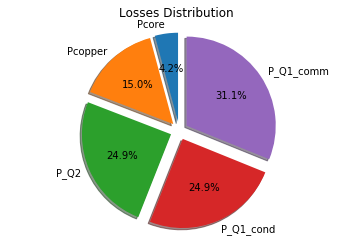

Total losses = 29.4054584648760 W
Estimated efficiency = 99.0293323601596 %


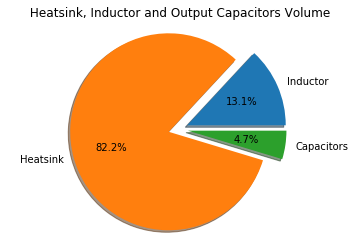

 Total Volume = 0.7842300000000001 L
 Power Density = 3.82540836234268 kW/dm^3


In [40]:
Pt=PL_total+P_total_Q2+Pcond_Q1+Pcomm_Q1


labels = ["Pcore", "Pcopper", "P_Q2", "P_Q1_cond","P_Q1_comm"]
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

sizes = np.array([Pcore/Pt,Pcu/Pt,P_total_Q2/Pt,Pcond_Q1/Pt,Pcomm_Q1/Pt])
explode = (0.1, 0.1, 0.1, 0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Losses Distribution ")
plt.show()
print ( 'Total losses =',Pt,'W')
print ( 'Estimated efficiency =', Prated/(Prated+Pt)*100,'%')

## Volume

labels11 = ["Inductor", "Heatsink","Capacitors"]
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
Vt=Ve*1.5+Volume_heatsink+Vcap
sizes11 = np.array([Ve*1.5/Vt,Volume_heatsink/Vt,Vcap/Vt])
explode11 = (0.1, 0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig2, ax1 = plt.subplots()
ax1.pie(sizes11, explode=explode11, labels=labels11, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(" Heatsink, Inductor and Output Capacitors Volume")
plt.show()
print (' Total Volume =',Vt/1000,'L')
print (' Power Density =',Prated/1000/(Vt/1000), 'kW/dm^3')

### References

[1]https://www.renesas.com/br/en/document/whp/design-considerations-bidirectional-dcdc-converter?language=en
    
HART, D. W. Eletrônica de Potência: análise e projetos de circuitos. – Porto Alegre: AMGH, 2012. 

PSIM - User's Guide - Version 11.1. POWERSIM INC, 2018.

